

# Project: No Show Appointment Dataset Analysis



## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this project will be analyzing the No Show Appointment Dataset. In particular, I will be interested in finding whether the hypertension is associated with no_show and whether the handicap is associated with no_show attribute.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib as plt 
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.shape

(110527, 14)

In [4]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB



### Data Cleaning 

> Rename columns to small, and drop some columns to be ready to answer the questions. such as drop patient_id column because already has appointment_id to do the same job, and drop schedule_day because already has appointment_day that doing the same job without details. Replace no_show column with numeric type, and convert appointment_id column to date type.
 

In [6]:
#change columns names
df.rename(columns={'PatientId':'patient_id',
                   'AppointmentID':'appointment_id',
                   'Gender':'gender',
                   'ScheduledDay':'schedule_day',
                   'AppointmentDay':'appointment_day',
                   'Age':'age',
                   'Neighbourhood':'neighborhood',
                   'Scholarship':'scholarship',
                   'Hipertension':'hypertension',
                   'Diabetes':'diabetes',
                   'Alcoholism':'alcoholism',
                   'Handcap':'handicap',
                   'SMS_received':'sms_received',
                   'No-show':'no_show'}, inplace=True)

In [7]:
#drop patient_id, schedule_day
df.drop(['patient_id', 'schedule_day'], axis=1, inplace = True)

In [8]:
#replace no_show column with 1 for yes and 0 for no
df = df.replace({'no_show': {'Yes': 1, 'No': 0}})

In [9]:
#convert appointment as datetime type
df['appointment_day'] = df['appointment_day'].astype('datetime64[ns]')

In [10]:
df.head()

,appointment_id,gender,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,5642903,F,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5642503,M,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,5642549,F,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,5642828,F,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,5642494,F,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0


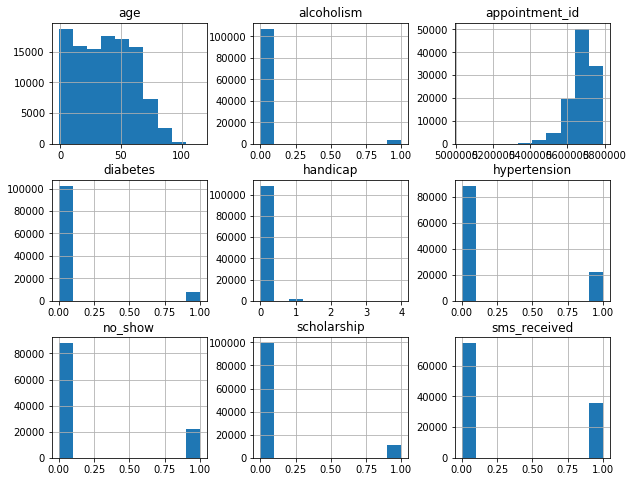

In [11]:
df.hist(figsize=(10, 8));

<a id='eda'></a>
## Exploratory Data Analysis

> Now will answer the questions that been written in the introduction, using a clean dataset. In this investigation, no_show attribute is a dependent variable, and the others are independent variables, and I will explore the associations among them. The first question was whether the hypertension is associated with no_show attribute, and the second question was whether the handicap is associated with no_show attribute.


### Q1:  Hypertension is assocated with no_show 

In [12]:
#masks for shown rows and unshown rows
show = df.no_show == True
no_show = df.no_show == False

In [13]:
#the mean of patients who has hypertension and already shown
df.hypertension[show].mean()

0.16900398763385457

In [14]:
#the mean of patients who has hypertension and didn't shown yet
df.hypertension[no_show].mean()

0.20439189189189189

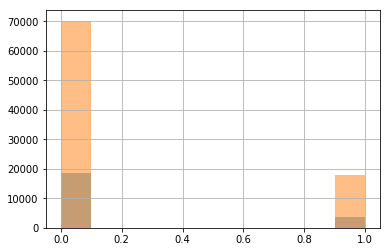

In [15]:
#visualize the means distribution
df.hypertension[show].hist(alpha=0.5, bins=10, label='shown');
df.hypertension[no_show].hist(alpha=0.5, bins=10, label='unshown');

In [16]:
#look at the diabetes and hypertension mean of patients who didn't shown yet
df.groupby(['diabetes', 'hypertension']).no_show.mean()

diabetes  hypertension
0         0               0.209215
          1               0.171792
1         0               0.198353
          1               0.175917
Name: no_show, dtype: float64

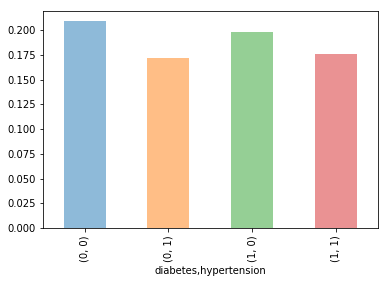

In [17]:
#visulaze the diabetes and hypertension mean of patients who didn't shown yet
df.groupby(['diabetes', 'hypertension']).no_show.mean().plot(kind = 'bar', alpha=0.5);

In [18]:
#look at the gender mean of patients who didn't shown yet
df.groupby('gender').no_show.mean()

gender
F    0.203146
M    0.199679
Name: no_show, dtype: float64

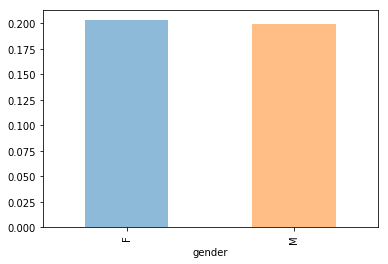

In [19]:
#visualize the gender mean of patients who didn't shown yet
df.groupby('gender').no_show.mean().plot(kind = 'bar', alpha=0.5);

In [20]:
#look at the mean for gender and diabetes of patients who didn't shown yet
df.groupby(['gender', 'diabetes', 'hypertension']).no_show.mean()

gender  diabetes  hypertension
F       0         0               0.211479
                  1               0.171109
        1         0               0.198697
                  1               0.178015
M       0         0               0.205245
                  1               0.173353
        1         0               0.197761
                  1               0.170461
Name: no_show, dtype: float64

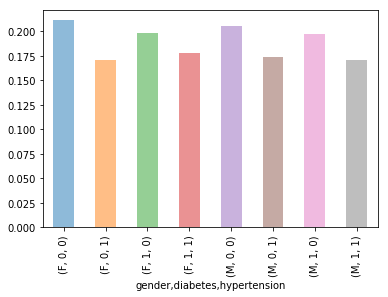

In [21]:
#visualize the mean for gender and diabetes of patients who didn't shown yet
df.groupby(['gender', 'diabetes', 'hypertension']).no_show.mean().plot(kind = 'bar', alpha=0.5);

### Q2: Handicap is assocated with no_show 

In [22]:
#look at the mean of patients for each handicap type who has already shown
df.handicap[show].mean()

0.020296608270979882

In [23]:
#look at the mean of patients for each handicap type who didn't shown yet
df.handicap[no_show].mean()

0.022741701432976602

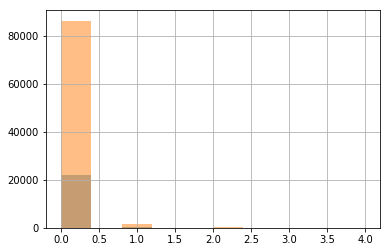

In [24]:
#visualize the means distribution
df.handicap[show].hist(alpha=0.5, bins=10, label='shown');
df.handicap[no_show].hist(alpha=0.5, bins=10, label='unshown');

In [25]:
#look at the mean for each for each handicap type of patients and didn't shown yet
df.groupby('handicap').no_show.mean()

handicap
0    0.202353
1    0.179236
2    0.202186
3    0.230769
4    0.333333
Name: no_show, dtype: float64

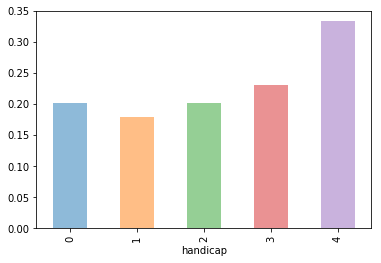

In [26]:
#visualize the mean for each handicap type of patients and didn't shown yet
df.groupby('handicap').no_show.mean().plot(kind = 'bar', alpha=0.5);

In [27]:
#look at the gender mean of patients who didn't shown yet
df.groupby('gender').no_show.mean()

gender
F    0.203146
M    0.199679
Name: no_show, dtype: float64

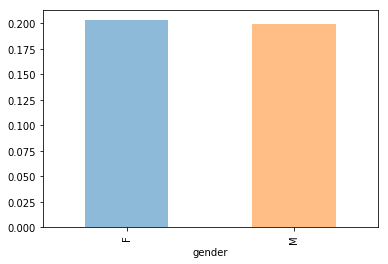

In [28]:
#visualize the gender mean of patients who didn't shown yet
df.groupby('gender').no_show.mean().plot(kind = 'bar', alpha=0.5);

In [29]:
#look at the mean for each handicap and gender types of patients who didn't shown yet
df.groupby(['gender', 'handicap']).no_show.mean()

gender  handicap
F       0           0.203416
        1           0.183743
        2           0.238095
        3           0.000000
        4           1.000000
M       0           0.200366
        1           0.173055
        2           0.153846
        3           0.300000
        4           0.000000
Name: no_show, dtype: float64

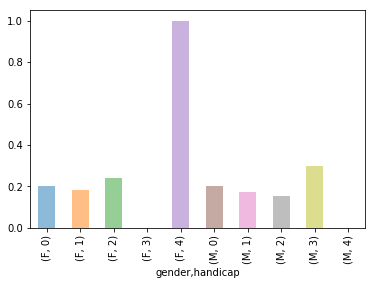

In [30]:
#visulaze the mean for each handicap and gender types of patients who didn't shown yet
df.groupby(['gender', 'handicap']).no_show.mean().plot(kind = 'bar', alpha=0.5);

<a id='conclusions'></a>
## Conclusions

> **Finding 1:** The dataset has some limitations such as redundant data like schedule_day, incorrect data like patient_id, incorrect columns names, date column was as a string, also no_show column was as int type and can not visualize it. For that, the data was handled through dropping redundant columns using drop function, rename the columns using rename function, convert the data column type using astype function, convert no_show column using replace function.

> **Finding 2:** The first question was asked to find whether the hypertension is associated with no_show attribute. The result shows that 20% of patients have hypertension and did not show, also 17% of patients who have hypertension, diabetes and did not come yet. That means the patient who has hypertension, diabetes or both did not care about coming to the appointment. In addition, to be specific I calculate a number of female and male who does not care about his self, but the result was almost similar 17.80% female and 17.04% male. Finally, the result represents as a female patient who has hypertension, diabetes may effect by 17.80% to been unshown. 

> **Finding 3:** The second question was to find whether the handicap is associated with no_show attribute. The result represents 2% of the patients have a handicap and did not show, also 33% of them have the fourth degree of handicap. That means, 2 persons from 100 ones did not come to the appointment and should the hospital make a solution for him. In the other side, I try to calculate whether the gender effect the handicap patients to did not come, and I surprised the result shows that no male patients have the fourth degree of handicap in the dataset and 100% of a female patient who has the fourth degree of handicap and did not show yet. Finally, The result represents as a female patient who has the fourth degree of handicap you may effect by 100% to be unshown. 

In [31]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

255